<a href="https://colab.research.google.com/github/vishvani/Desktop_Assistant/blob/main/crop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing packages and preprocessing data

In [ ]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/crop-dataset.csv")
df.head()
#df.info()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


In [ ]:
#DATA PREPROCESSING
df.isnull().sum()

N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
STATE          0
CROP_PRICE     0
CROP           0
dtype: int64

In [ ]:
df.corr()

<ipython-input-4-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
N_SOIL,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.001302
P_SOIL,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.023683
K_SOIL,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.021923
TEMPERATURE,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.029044
HUMIDITY,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,-0.041414
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.033548
RAINFALL,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.058847
CROP_PRICE,-0.001302,-0.023683,-0.021923,-0.029044,-0.041414,-0.033548,0.058847,1.000000


<ipython-input-5-a72216714ba9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="crest")


<Axes: >

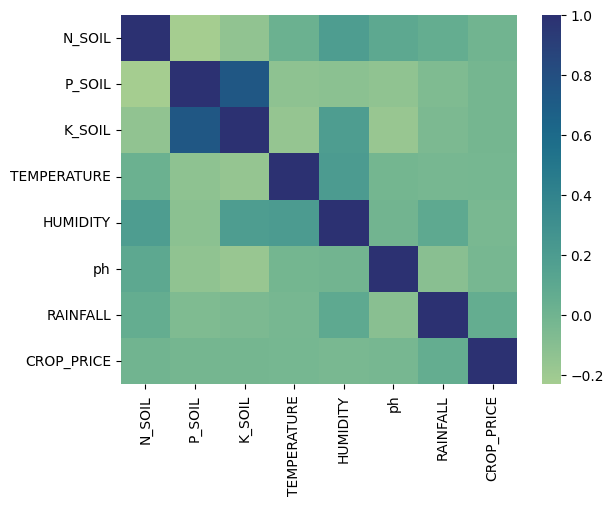

In [ ]:
sns.heatmap(df.corr(),cmap="crest")

In [ ]:
df.nunique()

N_SOIL          137
P_SOIL          117
K_SOIL           73
TEMPERATURE    2200
HUMIDITY       2200
ph             2200
RAINFALL       2200
STATE            26
CROP_PRICE      502
CROP             22
dtype: int64

In [ ]:
df.CROP.unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [ ]:
df.drop(['STATE'],axis=1,inplace=True)

In [ ]:
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,120000,Rice
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,1500,Coffee


In [ ]:
df.P_SOIL=np.log(df['P_SOIL'])
df.K_SOIL=np.log(df['K_SOIL'])
df['HUMIDITY']=np.log(df['HUMIDITY'])

In [ ]:
iq1=df['CROP_PRICE'].quantile(0.25)
iq2=df['CROP_PRICE'].quantile(0.75)
iq1
iq2

3500.0

In [ ]:
df['CROP_PRICE']=np.where(df['CROP_PRICE']<iq1,iq1,df['CROP_PRICE'])
df['CROP_PRICE']=np.where(df['CROP_PRICE']>iq2,iq2,df['CROP_PRICE'])

In [ ]:
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE,CROP
0,90,1.318462,1.324738,20.879744,1.483138,6.502985,202.935536,3500.0,Rice
1,85,1.401292,1.311994,21.770462,1.478421,7.038096,226.655537,3500.0,Rice
2,60,1.388126,1.330832,23.004459,1.484016,7.840207,263.964248,3500.0,Rice
3,74,1.268453,1.305323,26.491096,1.477963,6.980401,242.864034,3500.0,Rice
4,78,1.318462,1.318462,20.130175,1.482034,7.628473,262.717340,3500.0,Rice
...,...,...,...,...,...,...,...,...,...
2195,107,1.260266,1.242925,26.774637,1.434107,6.780064,177.774507,1000.0,Coffee
2196,99,0.996229,1.192660,27.417112,1.395415,6.086922,127.924610,950.0,Coffee
2197,118,1.251765,1.224128,24.131797,1.436999,6.362608,173.322839,950.0,Coffee
2198,117,1.242925,1.260266,26.272418,1.374649,6.758793,127.175293,1500.0,Coffee


In [ ]:
df.skew()

<ipython-input-13-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


N_SOIL         0.509721
P_SOIL        -0.782108
K_SOIL         0.804010
TEMPERATURE    0.184933
HUMIDITY      -1.900877
ph             0.283929
RAINFALL       0.965756
CROP_PRICE     0.283069
dtype: float64

In [ ]:
#ENCODING CATEGORICAL INTO NUMERICAL¶
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['CROP']=le.fit_transform(df['CROP'])

In [ ]:
#SPLITING OF FEATURES
x=df.iloc[:,0:8]
y=df.iloc[:,8]
y.head()


0    20
1    20
2    20
3    20
4    20
Name: CROP, dtype: int64

In [ ]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Apple': 0, 'Banana': 1, 'Blackgram': 2, 'ChickPea': 3, 'Coconut': 4, 'Coffee': 5, 'Cotton': 6, 'Grapes': 7, 'Jute': 8, 'KidneyBeans': 9, 'Lentil': 10, 'Maize': 11, 'Mango': 12, 'MothBeans': 13, 'MungBean': 14, 'Muskmelon': 15, 'Orange': 16, 'Papaya': 17, 'PigeonPeas': 18, 'Pomegranate': 19, 'Rice': 20, 'Watermelon': 21}


In [ ]:
#TRAIN-TEST-SPLIT

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=4)

In [ ]:
print("Training data",x_train.shape)
print("Training data",x_test.shape)

Training data (1540, 8)
Training data (660, 8)


#Decision Tree

In [ ]:
# Training model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

array([20.,  9., 17., 14.,  3., 18., 13., 21.,  5., 13., 13., 21.,  6.,
       15.,  1.,  5., 11.,  7.,  0.,  9., 21.,  6.,  4.,  6.,  8., 17.,
        8., 15.,  4., 20., 10.,  0.,  8., 20.,  6.,  2.,  0.,  4.,  3.,
       20., 17., 21.,  4., 17., 17.,  3.,  8.,  2., 20., 11.,  7., 10.,
       21., 14.,  8., 13.,  1., 20.,  0., 11.,  4., 11.,  5., 12.,  7.,
        7., 10., 14.,  7., 21., 10.,  4., 21.,  9., 12.,  8.,  4.,  6.,
       12.,  7., 15., 18., 13.,  3., 19., 15., 14.,  3.,  0., 14., 18.,
       21., 21.,  4.,  4., 15.,  8., 10., 14.,  0.,  2., 19.,  4., 14.,
        8.,  7., 10., 18., 18., 17.,  5., 18., 17.,  0., 14., 15.,  7.,
        3., 16.,  1., 16., 21.,  5.,  2., 18.,  2.,  8.,  4., 14., 16.,
       20.,  2., 13., 15.,  9.,  1., 21.,  0.,  5., 11.,  3.,  8.,  6.,
       19.,  3., 17.,  2.,  0., 15.,  1., 17., 18., 20., 12., 19., 21.,
        7., 10., 20., 11., 11.,  2.,  3.,  6., 20., 12., 18.,  8.,  1.,
        3., 13., 11., 20.,  0., 17., 18., 18., 16., 10., 10., 18

In [ ]:
regressor.score(x_test,y_test)

0.8952888176109762

In [ ]:
# Calculating R2 score :

from sklearn.metrics import r2_score
r1 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r1)

R2 score :  0.8952888176109762


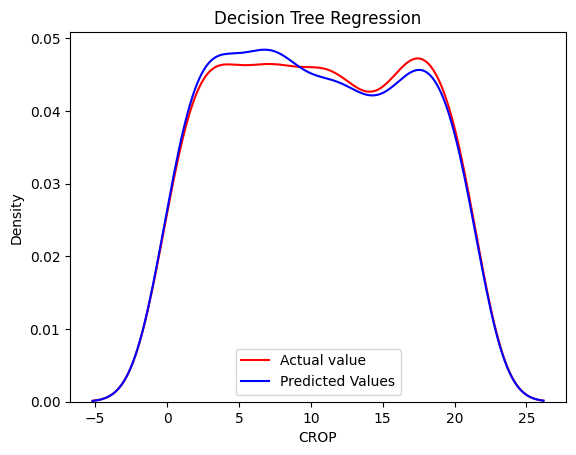

In [ ]:
ax = sns.kdeplot(y_test, color = "r", label = "Actual value ")
sns.kdeplot(decisiontree_predict, color = "b", label = "Predicted Values", ax = ax)
plt.title('Decision Tree Regression')
plt.legend()

#Random Forest Algorithm

In [ ]:
#Random Forest Algorithm
from sklearn.ensemble import RandomForestRegressor
modelRT = RandomForestRegressor(n_estimators = 25)
modelRT.fit(x_train,y_train)
rf_predict = modelRT.predict(x_test)
rf_predict

array([17.6 ,  9.16, 17.  , 14.  ,  3.  , 18.  , 13.  , 21.  ,  5.36,
       13.04, 13.  , 21.  ,  6.  , 15.  ,  1.  ,  5.  , 11.  ,  7.  ,
        0.  ,  9.  , 21.  ,  6.  ,  4.  ,  6.  , 17.  , 16.4 , 17.  ,
       15.  ,  4.  , 20.  ,  9.04,  0.  , 13.28, 17.28,  6.  ,  2.36,
        0.  ,  4.  ,  2.88, 20.  , 17.  , 21.  ,  4.  , 16.4 , 17.  ,
        3.24, 11.8 ,  3.56, 20.  , 10.88,  7.  , 10.  , 21.  , 14.  ,
       14.6 , 13.  ,  1.  , 17.  ,  0.  , 10.04,  4.  , 10.88,  5.  ,
       12.  ,  7.  ,  7.  ,  9.64, 14.  ,  7.  , 21.  , 10.76,  4.  ,
       21.  ,  9.  , 12.  , 17.24,  4.  ,  6.  , 12.  ,  7.  , 15.  ,
       17.36, 12.88,  3.24, 19.  , 15.  , 14.  ,  3.8 ,  0.  , 14.  ,
       17.  , 19.32, 21.  ,  4.  ,  4.  , 15.  , 10.88, 10.  , 14.  ,
        0.  ,  3.08, 17.64,  4.  , 14.  , 10.4 ,  6.84, 10.16, 14.72,
       10.72, 17.  ,  5.  , 14.8 , 17.24,  0.  , 14.  , 15.  ,  7.  ,
        3.  , 16.  ,  1.  , 16.  , 21.  ,  5.  ,  3.12, 18.  ,  2.  ,
        7.76,  4.  ,

In [ ]:
# Calculating R2 score
modelRT.score(x_test,y_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,rf_predict)
print("R2 score : ",r2)

R2 score :  0.9498979874162212


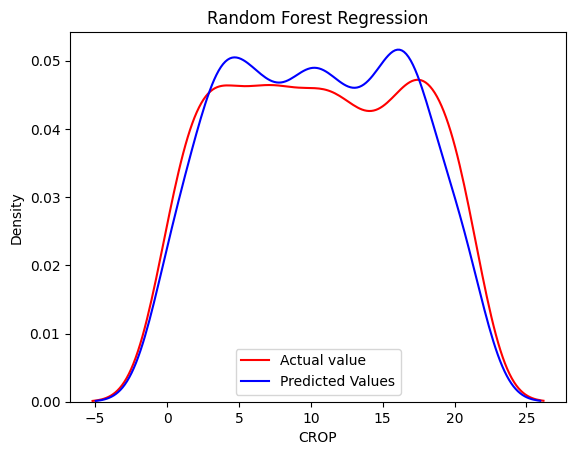

In [ ]:
ax = sns.kdeplot(y_test, color = "r", label = "Actual value ")
sns.kdeplot(rf_predict, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')
plt.legend()

#Support Vector Regression

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
print(x_train)
print(x_test)

[[ 0.9785182  -0.84965018 -0.27249389 ...  0.67391741  1.67716497
   1.32476675]
 [-0.28900059 -0.9751141  -1.95416164 ...  1.24312164 -0.0116784
  -0.2666639 ]
 [-1.3407715   0.79876649 -0.79301757 ...  0.27205096  1.37449398
   1.32476675]
 ...
 [-0.01931574  0.76198692 -0.9423232  ...  0.10523333 -0.53446189
   1.32476675]
 [ 0.68186487 -0.12136482 -0.47942068 ...  0.69498292 -0.7117482
   1.13186606]
 [-0.39687453 -1.11314443 -0.09324574 ... -1.96574654 -0.19278675
   1.32476675]]
[[ 0.87203155  0.14240522  0.03355219 ... -0.18035825  1.55999325
   0.23168464]
 [-0.44292678  0.42507472 -0.904007   ... -0.96138836 -0.3054747
   0.63425224]
 [-0.0320023   0.47074378  0.33537883 ...  0.34910339  2.39468243
  -1.03493048]
 ...
 [ 1.33774596 -0.07353772  0.03355219 ...  0.31626565  1.37127445
  -1.03493048]
 [-1.34696063 -0.54791702 -0.25891378 ... -0.56582604 -0.20187596
  -0.98583687]
 [-1.23738077  0.55775363 -0.83087503 ...  0.62421456 -0.99224334
  -1.03493048]]


In [ ]:
# Training the SVR model

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)

SVR()

In [ ]:
# Predicting Result

svr_predict = regressor.predict(x_test)
svr_predict

array([10.53804689,  9.36011404, 15.77834032, 14.44475821,  3.04282463,
       15.91438841, 12.84983016, 17.30651994,  6.5934732 , 13.59481794,
       11.7746015 , 13.62983216,  6.23173802, 16.81164401,  2.23175825,
        6.70300056,  9.74067027,  7.63784706,  4.06160401,  9.01784302,
       19.4439943 ,  5.48383444,  6.56544459,  5.946663  , 17.1589807 ,
       11.80519729, 16.38506902, 15.60967961,  9.61147479, 14.75629228,
       10.16990223,  0.5852395 ,  9.79077746, 11.02319064,  6.39753934,
        8.84862469,  0.55566329,  9.81145599,  4.08636039, 14.05125511,
       14.39406234, 20.6106366 , 10.16752802, 11.5409692 , 13.82925892,
        3.81357181,  5.98615461, 10.84006904, 16.3138787 ,  9.88167844,
        4.23126296, 10.60728455, 16.25532783, 15.12277774,  8.49500526,
       13.05340129,  2.43295726,  9.23205396,  4.30587885,  4.7249547 ,
        7.96725516, 10.07096698,  4.89776792, 11.94418273,  5.70294642,
        6.60726329, 11.33833406, 13.99922677,  5.00916866, 16.26

In [ ]:
regressor.score(x_test,y_test)
r4 = r2_score(y_test,svr_predict)
print("R2 score : ",r4)


R2 score :  0.7567555569465224


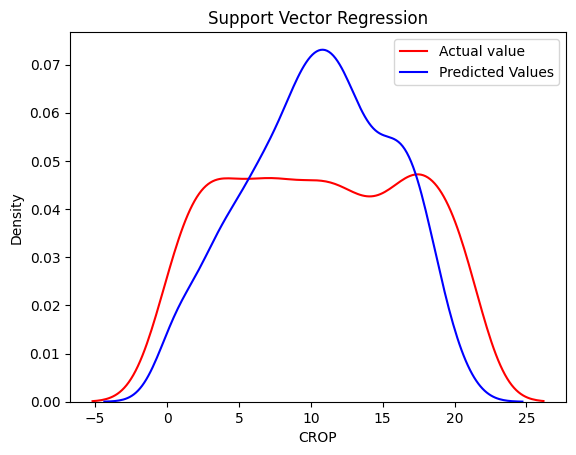

In [ ]:
ax = sns.kdeplot(y_test, color = "r", label = "Actual value ")
sns.kdeplot(svr_predict, color = "b", label = "Predicted Values", ax = ax)
plt.title('Support Vector Regression')
plt.legend()

#GaussianNB

In [ ]:
#IMPORTING ALGORITHM NAIVE BAYES
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=4)
from sklearn.naive_bayes import GaussianNB
modelG = GaussianNB()
modelG.fit(x_train,y_train)

#PREDICTION OF CROP
y_prediction=modelG.predict(x_test)

#MODEL METRICS
from sklearn.metrics import accuracy_score
r3=accuracy_score(y_test,y_prediction)
r3

0.9818181818181818

In [ ]:
new = np.array([  82.,    3.87120101,    3.58351894,   25.79351957,
           4.40389869,    6.35207678,  193.2418382 , 2240.        ])
count=modelG.predict([new])
crop = {i for i in le_name_mapping if le_name_mapping[i]==count[0]}
print("Crop GROUP:",crop)

Crop GROUP: {'Jute'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
new = np.array([  109.        ,    3.04452244,    4.00733319,   24.9004602 ,
           4.49686358,    6.77027809,   57.44942094, 1550.        ])
count=modelG.predict([new])
crop = {i for i in le_name_mapping if le_name_mapping[i]==count[0]}
print("Crop GROUP:",crop)

Crop GROUP: {'Watermelon'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
new = np.array([  99.        ,   3.98898405,   3.61091791,  21.14347496,
          4.38620576,   5.59481963, 198.6730942 , 950.        ])
count=modelG.predict([new])
crop = {i for i in le_name_mapping if le_name_mapping[i]==count[0]}
print("Crop GROUP:",crop)

Crop GROUP: {'Rice'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
new = np.array([  81.        ,    4.02535169,    3.58351894,   23.39605743,
           4.28503556,    7.09758642,  174.7876411 , 1200.       ])
count=modelG.predict([new])
crop = {i for i in le_name_mapping if le_name_mapping[i]==count[0]}
print("Crop GROUP:",crop)

Crop GROUP: {'Jute'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


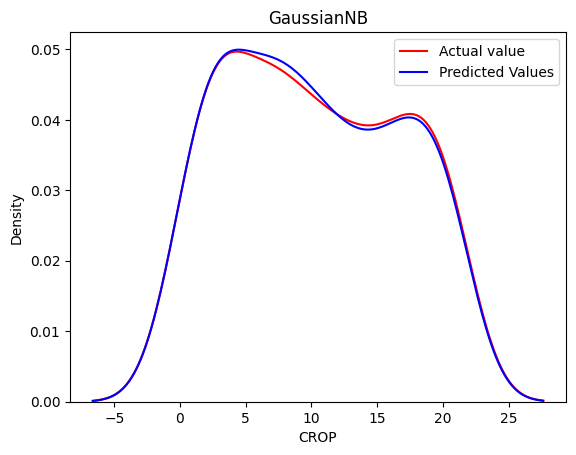

In [ ]:
ax = sns.kdeplot(y_test, color = "r", label = "Actual value ")
sns.kdeplot(y_prediction, color = "b", label = "Predicted Values", ax = ax)
plt.title('GaussianNB')
plt.legend()

#Cross-validation

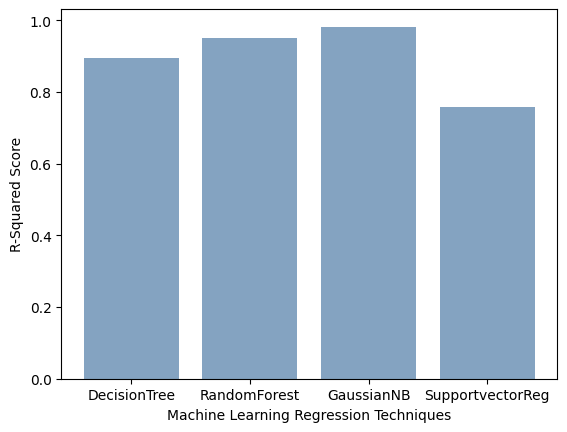

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['DecisionTree','RandomForest', 'GaussianNB','SupportvectorReg']
Accuracy = [r1,r2,r3,r4]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=(0.2, 0.4, 0.6, 0.6))

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('R-Squared Score')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')